In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
customers = pd.read_csv("olist_customers_dataset.csv")

In [10]:
df=pd.DataFrame(customers)
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [11]:
df.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [20]:
print("Dataset Shape:", customers.shape)
print("\nData Types:\n", customers.dtypes)
print("\nFirst 5 Rows:\n", customers.head())


Dataset Shape: (99441, 5)

Data Types:
 customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

First 5 Rows:
                         customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das 

In [22]:
#Check missing values
print("\nMissing Values:\n", customers.isnull().sum())


Missing Values:
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


In [21]:
#Check duplicates
print("\nDuplicate customer_id count:", customers.duplicated(subset='customer_id').sum())
print("Duplicate customer_unique_id count:", customers.duplicated(subset='customer_unique_id').sum())


Duplicate customer_id count: 0
Duplicate customer_unique_id count: 3345


In [19]:
#Unique counts
print("\nUnique customer_id:", customers['customer_id'].nunique())
print("Unique customer_unique_id:", customers['customer_unique_id'].nunique())
print("Unique cities:", customers['customer_city'].nunique())
print("Unique states:", customers['customer_state'].nunique())


Unique customer_id: 99441
Unique customer_unique_id: 96096
Unique cities: 4119
Unique states: 27


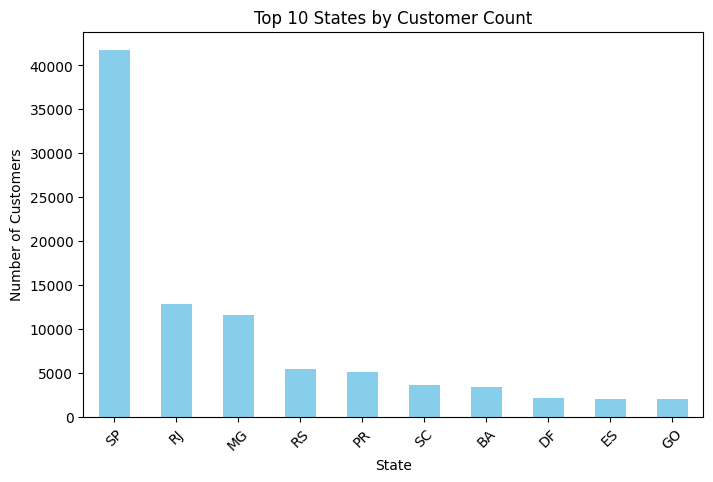

In [14]:
#  Top 10 states by customer count
state_counts = customers['customer_state'].value_counts().head(10)
plt.figure(figsize=(8, 5))
state_counts.plot(kind='bar', color='skyblue')
plt.title("Top 10 States by Customer Count")
plt.xlabel("State")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()

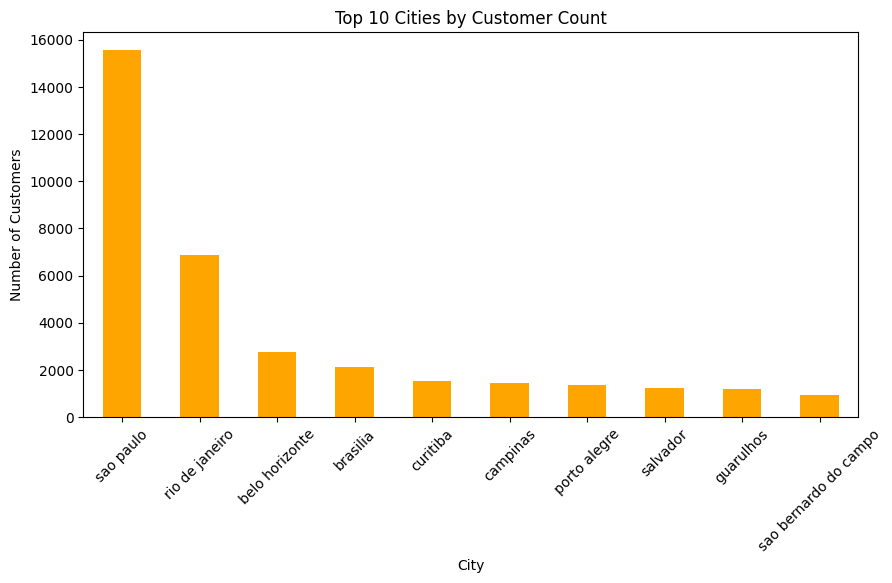

In [15]:
# Top 10 cities by customer count
city_counts = customers['customer_city'].value_counts().head(10)
plt.figure(figsize=(10, 5))
city_counts.plot(kind='bar', color='orange')
plt.title("Top 10 Cities by Customer Count")
plt.xlabel("City")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()

In [17]:
#Save cleaned dataset
customers.drop_duplicates(subset='customer_id', inplace=True)
customers.to_csv("olist_customers_clean.csv", index=False)
print("\nCleaned dataset saved as olist_customers_clean.csv")


Cleaned dataset saved as olist_customers_clean.csv


In [26]:
import pandas as pd

# Load dataset
customers = pd.read_csv("olist_customers_dataset.csv")

# ======================
# 1. Remove duplicates
# ======================
customers.drop_duplicates(subset="customer_id", inplace=True)

# ======================
# 2. Handle missing values
# ======================
# Drop rows with missing critical fields
customers.dropna(subset=["customer_id", "customer_unique_id"], inplace=True)

# Fill missing city/state with "Unknown"
customers["customer_city"] = customers["customer_city"].fillna("Unknown")
customers["customer_state"] = customers["customer_state"].fillna("Unknown")

# ======================
# 3. Format and clean text fields
# ======================
# Make city names lowercase and strip spaces
customers["customer_city"] = customers["customer_city"].str.lower().str.strip()

# Make state codes uppercase
customers["customer_state"] = customers["customer_state"].str.upper()

# Ensure ZIP code is string and zero-padded
customers["customer_zip_code_prefix"] = customers["customer_zip_code_prefix"].astype(str).str.zfill(5)

# ======================
# 4. Save cleaned file
# ======================
customers.to_csv("clean_customers.csv", index=False)

print(f"✅ Customer dataset cleaned. Shape: {customers.shape}")


✅ Customer dataset cleaned. Shape: (99441, 5)


✅ Customer dataset cleaned. Shape: (99441, 5)

Unique customers: 99441
Unique cities: 4119
Unique states: 27


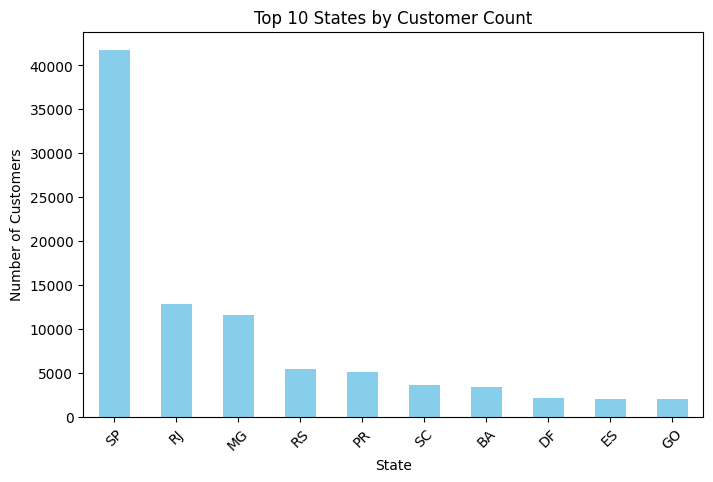

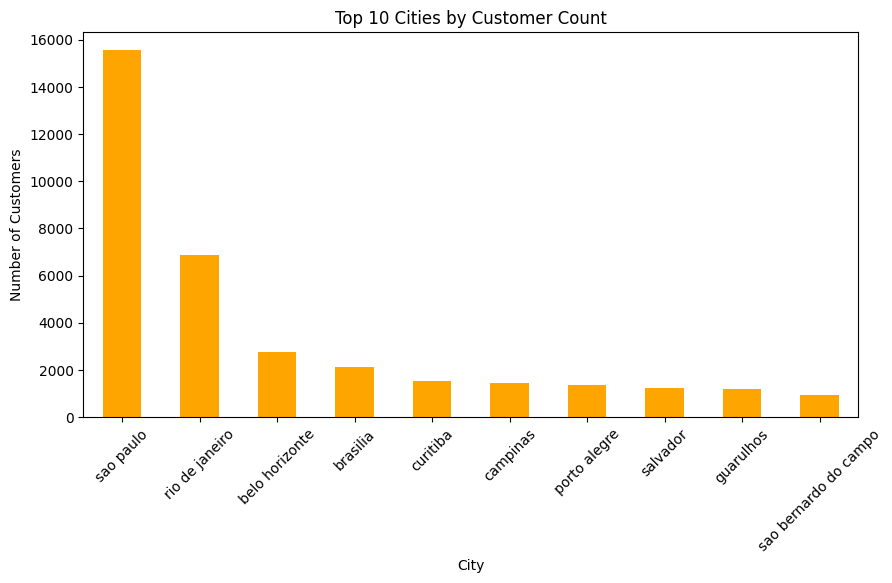

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# ======================
# 1. Load dataset
# ======================
customers = pd.read_csv("olist_customers_dataset.csv")

# ======================
# 2. Remove duplicates
# ======================
customers.drop_duplicates(subset="customer_id", inplace=True)

# ======================
# 3. Handle missing values
# ======================
customers.dropna(subset=["customer_id", "customer_unique_id"], inplace=True)
customers["customer_city"] = customers["customer_city"].fillna("Unknown")
customers["customer_state"] = customers["customer_state"].fillna("Unknown")

# ======================
# 4. Format text fields
# ======================
customers["customer_city"] = customers["customer_city"].str.lower().str.strip()
customers["customer_state"] = customers["customer_state"].str.upper()
customers["customer_zip_code_prefix"] = customers["customer_zip_code_prefix"].astype(str).str.zfill(5)

# ======================
# 5. Save cleaned file
# ======================
customers.to_csv("clean_customers.csv", index=False)
print(f"✅ Customer dataset cleaned. Shape: {customers.shape}")

# ======================
# 6. Quick Exploratory Analysis
# ======================
print("\nUnique customers:", customers['customer_id'].nunique())
print("Unique cities:", customers['customer_city'].nunique())
print("Unique states:", customers['customer_state'].nunique())

# Top 10 states by customer count
top_states = customers['customer_state'].value_counts().head(10)
plt.figure(figsize=(8, 5))
top_states.plot(kind='bar', color='skyblue')
plt.title("Top 10 States by Customer Count")
plt.xlabel("State")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()

# Top 10 cities by customer count
top_cities = customers['customer_city'].value_counts().head(10)
plt.figure(figsize=(10, 5))
top_cities.plot(kind='bar', color='orange')
plt.title("Top 10 Cities by Customer Count")
plt.xlabel("City")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()


✅ Cleaned file saved as: clean_customers.xlsx
Total customers: 99441
Unique customer_unique_id: 96096
Duplicate ratio: 3.36%
States covered: 27, Cities covered: 4119


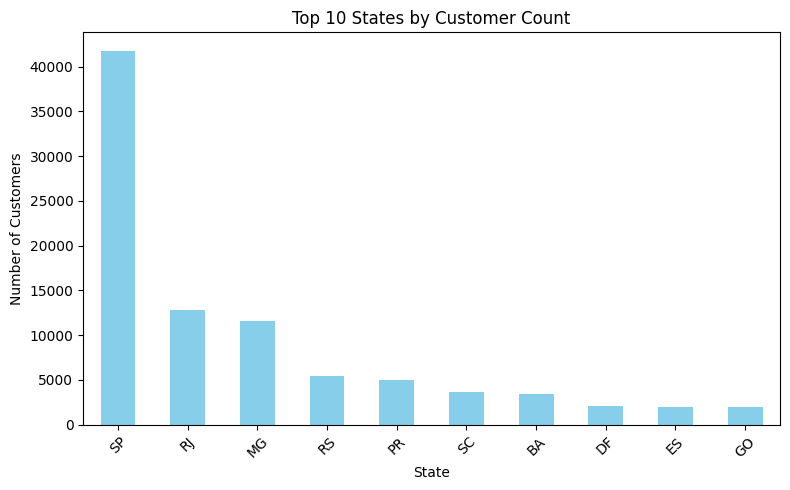

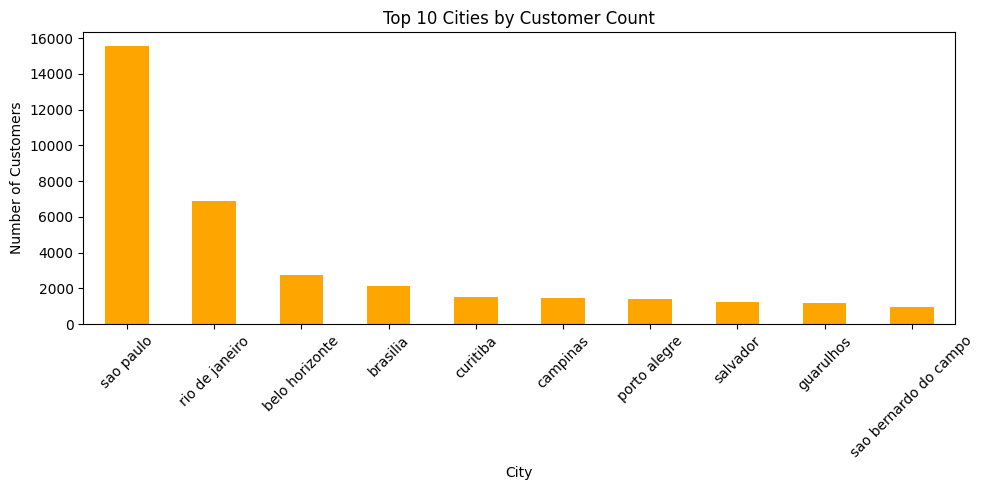

✅ Summary file saved as: customer_summary.xlsx


In [30]:
# Olist Customers Analysis Notebook
# Author: Zoha's AI Mentor

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# ======================
# 1. Load dataset
# ======================
file_path = "olist_customers_dataset.csv"  # upload in same folder
customers = pd.read_csv(file_path)

# ======================
# 2. Clean dataset
# ======================
customers.drop_duplicates(subset="customer_id", inplace=True)
customers.dropna(subset=["customer_id", "customer_unique_id"], inplace=True)

customers["customer_city"] = customers["customer_city"].fillna("Unknown").astype(str).str.lower().str.strip()
customers["customer_state"] = customers["customer_state"].fillna("Unknown").astype(str).str.upper().str.strip()
customers["customer_zip_code_prefix"] = customers["customer_zip_code_prefix"].astype(str).str.zfill(5)

# ======================
# 3. Save cleaned file (Excel)
# ======================
cleaned_excel = "clean_customers.xlsx"
customers.to_excel(cleaned_excel, index=False)
print(f"✅ Cleaned file saved as: {cleaned_excel}")

# ======================
# 4. KPI calculations
# ======================
total_customers = customers['customer_id'].nunique()
total_unique_ids = customers['customer_unique_id'].nunique()
duplicate_ratio = 1 - (total_unique_ids / total_customers) if total_customers else 0.0
n_cities = customers['customer_city'].nunique()
n_states = customers['customer_state'].nunique()

print(f"Total customers: {total_customers}")
print(f"Unique customer_unique_id: {total_unique_ids}")
print(f"Duplicate ratio: {duplicate_ratio:.2%}")
print(f"States covered: {n_states}, Cities covered: {n_cities}")

# ======================
# 5. Top states chart
# ======================
top_states = customers['customer_state'].value_counts().head(10)
plt.figure(figsize=(8, 5))
top_states.plot(kind='bar', color='skyblue')
plt.title("Top 10 States by Customer Count")
plt.xlabel("State")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("top_states.png")
plt.show()

# ======================
# 6. Top cities chart
# ======================
top_cities = customers['customer_city'].value_counts().head(10)
plt.figure(figsize=(10, 5))
top_cities.plot(kind='bar', color='orange')
plt.title("Top 10 Cities by Customer Count")
plt.xlabel("City")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("top_cities.png")
plt.show()

# ======================
# 7. Save summary to Excel
# ======================
summary_df = pd.DataFrame({
    "Metric": ["Total Customers", "Unique Customer IDs", "Duplicate Ratio", "States Covered", "Cities Covered"],
    "Value": [total_customers, total_unique_ids, f"{duplicate_ratio:.2%}", n_states, n_cities]
})
summary_excel = "customer_summary.xlsx"
summary_df.to_excel(summary_excel, index=False)
print(f"✅ Summary file saved as: {summary_excel}")


In [31]:

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [32]:
customers.drop_duplicates(subset="customer_id", inplace=True)
customers.dropna(subset=["customer_id", "customer_unique_id"], inplace=True)

customers["customer_city"] = customers["customer_city"].fillna("Unknown").astype(str).str.lower().str.strip()
customers["customer_state"] = customers["customer_state"].fillna("Unknown").astype(str).str.upper().str.strip()
customers["customer_zip_code_prefix"] = customers["customer_zip_code_prefix"].astype(str).str.zfill(5)

In [ ]:
cleaned_excel = "clean_customers.xlsx"
customers.to_excel(cleaned_excel, index=False)
print(f"✅ Cleaned file saved as: {cleaned_excel}")
